<a href="https://colab.research.google.com/github/Tran-Thu-Le/share/blob/main/ML/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Techniques

**Abstract.** This note investigates some supervised classification methods using [Scikit-learn][sl].

[sl]: https://en.wikipedia.org/wiki/Scikit-learn

This note relies on the following packages:
- [numpy][np] tools for array
- [pandas][pd] data handling
- [matplotlib][mat] plot tools
- [seaborn][sns] plot tools
- [sklearn][sklearn] machine learning tools

[np]: https://numpy.org/install/
[pd]: https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html
[mat]: https://matplotlib.org/stable/users/installing.html
[sns]: https://seaborn.pydata.org/installing.html
[sklearn]: https://scikit-learn.org/stable/install.html


We also use some functions:
- [`sklearn.metrics.accuracy_score`][1] computes the accuracy of `y_pred` with respect to `y_true`.
- [`sklearn.model_selection.train_test_split`][2] splits the data `X` and `y` to train and test data.


[1]: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
[2]: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


Some classification techniques we shall investigate:
- [Decision tree][dt]
- [Random forest][rf]
- [K nearest neighboirs (KNN)][knn]
- [Support Vector Machine (SVM)][svm]
- [Naive Bayes][nb]: [scratch][nb_s]
- [Logistic regression][lr]


[dt]: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
[rf]: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
[knn]: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
[svm]: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
[nb]: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
[nb_s]: https://www.youtube.com/watch?v=3I8oX3OUL6I&ab_channel=NormalizedNerd
[lr]: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## data

In the following, we use the [Iris flower data set][iris]. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

[iris]: https://en.wikipedia.org/wiki/Iris_flower_data_set

![abc](https://miro.medium.com/max/612/1*gVUMIDt5Nz0WMArjgGN_Gg.png)

More precisely, the data includes arrays `X` and `y`:
- Each row of 2D-array `X` contains 4 features of a flower: sepal length (cm), sepal width (cm), petal length (cm), petal width (cm).
- Each element in 1D-array `y` endcoded by $\color{cyan}{0}$, $\color{orange}{1}$, $\color{purple}{2}$ corresponding to three Iris species $\color{cyan}{setosa}$, $\color{orange}{virginica}$ and $\color{purple}{versicolor}$, respectively.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


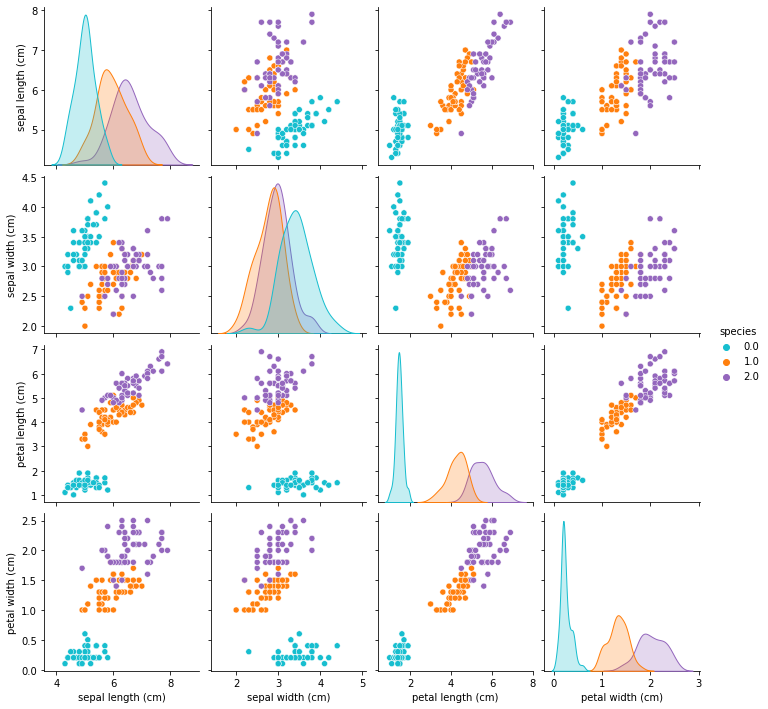

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np

# load features X and labels y
iris = load_iris()
X, y = iris.data, iris.target

# illustrate the data and correlation plot of features corresponding to species
data_numpy = np.hstack((X, y.reshape(-1,1)))
df = pd.DataFrame(data_numpy, columns=iris.feature_names+['species'])
palette = {0.0:"tab:cyan",
           1.0:"tab:orange", 
           2.0:"tab:purple"}
sns.pairplot(df, hue="species", palette=palette)
df.head()

Before going to the classification techniques, let us import the `accuracy_score` function and split the data into training and test parts by function `train_test_split`

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=41)
print(f"X_train.shape={X_train.shape} y_train.shape={y_train.shape}")
print(f"X_test.shape={X_test.shape} y_test.shape={y_test.shape}")

X_train.shape=(90, 4) y_train.shape=(90,)
X_test.shape=(60, 4) y_test.shape=(60,)


## Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier
model_decision_tree = DecisionTreeClassifier()
model_decision_tree = model_decision_tree.fit(X_train, y_train)
y_pred = model_decision_tree.predict(X_test)
print(f"Prediction with Decision Tree has accuracy = {accuracy_score(y_test, y_pred)}")

Prediction with Decision Tree has accuracy = 0.9333333333333333


## Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier(max_depth=10, max_features=3)
model_random_forest = model_random_forest.fit(X_train, y_train)
y_pred = model_random_forest.predict(X_test)
print(f"Prediction with Random Forest has accuracy = {accuracy_score(y_test, y_pred)}") 

Prediction with Random Forest has accuracy = 0.9333333333333333


## Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB
model_naive_bayes = GaussianNB()
model_naive_bayes = model_naive_bayes.fit(X_train, y_train)
y_pred = model_naive_bayes.predict(X_test)
print(f"Prediction with Naive Bayes has accuracy = {accuracy_score(y_test, y_pred)}") 

Prediction with Naive Bayes has accuracy = 0.9333333333333333


## SVM

In [13]:
from sklearn.svm import SVC 
model_SVM = SVC()
model_SVM = model_SVM.fit(X_train, y_train)
y_pred = model_SVM.predict(X_test)
print(f"Prediction with SVM has accuracy = {accuracy_score(y_test, y_pred)}") 

Prediction with SVM has accuracy = 0.9466666666666667


## KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=11)
model_KNN  = model_KNN.fit(X_train, y_train)
y_pred = model_KNN.predict(X_test)
print(f"Prediction with KNN has accuracy = {accuracy_score(y_test, y_pred)}")

Prediction with KNN has accuracy = 0.9666666666666667


## Logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression(random_state=1)
model_logistic = model_logistic.fit(X_train, y_train)
y_pred = model_logistic.predict(X_test)
print(f"Prediction with Logistic Regression has accuracy = {accuracy_score(y_test, y_pred)}")

Prediction with Logistic Regression has accuracy = 0.9333333333333333
